# Legendre Polynomials

**Legendre's Differential Equation:** $$ (1-x^2)y'' - 2xy' + n(n+1)y = 0 $$

**Solution (Legendre Polynomials):** $$ P_n(x) = \sum_{k=0}^{m} (-1)^k \frac{(2n-2k)!}{2^n k! (n-k)!(n-2k)!} \, x^{n-2k} $$

For $n=even$, $m=\frac{n}{2}$ and for $n=odd$, $m=\frac{n-1}{2}$.

### from `scipy.special`

In [1]:
from scipy.special import legendre
legendre(3)(5)

305.0

## By calculations

In [2]:
def fact(n):
    fct = 1
    for i in range(2,n+1):
        fct *= i
    return fct

In [3]:
def Pn(n,x):
    trm = 0
    m = n//2  # for both even and odd n
    for k in range(0,m+1):
        trm += (-1)**k*fact(2*n-2*k)*x**(n-2*k)/(2**n*fact(k)*fact(n-k)*fact(n-2*k))
    return trm

In [4]:
Pn(3,5)

305.0

### By recurrence formula

$$ P_n(x) = \frac{2n-1}{n} xP_{n-1}(x) - \frac{n-1}{n} P_{n-2}(x) $$
Given, $P_0(x)=1$ and $P_1(x)=x$.

In [5]:
def recPn(n,x):
    P0 = 1
    P1 = x
    if n==0:
        Pn = P0
    elif n==1:
        Pn = P1
    else:
        Pn_1, Pn_2 = P1, P0
    for i in range(2,n+1):
        Pn = (2*i-1)/i*x*Pn_1 - (i-1)/i*Pn_2
        Pn_1, Pn_2 = Pn, Pn_1
    return Pn

In [6]:
recPn(3,5)

305.00000000000006

**Verification**

In [7]:
n1, x1 = 5,-1.5  # input values
print('by using function in scipy.special\n\t',legendre(n1)(x1))
print('by calculations\n\t',Pn(n1,x1))
print('by recurrence formula\n\t',recPn(n1,x1))

by using function in scipy.special
	 -33.08203125000001
by calculations
	 -33.08203125
by recurrence formula
	 -33.08203125


# Orthogonality of Legendre Polynomials

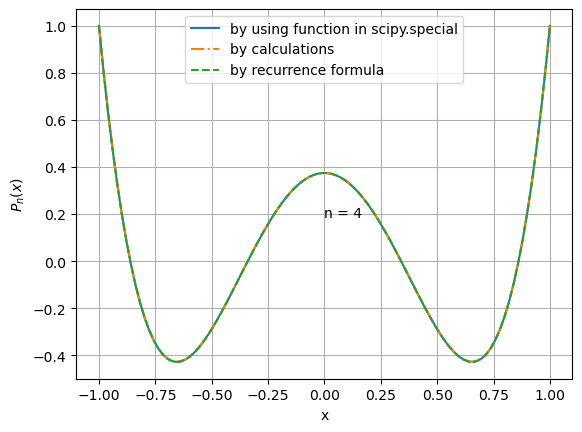

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 4   # input degree of the polynomial
x = np.linspace(-1,1,100)
legplot = legendre(n)(x)
Pnplot = [Pn(n,x[i]) for i in range(len(x))]
recPnplot = [recPn(n,x[i]) for i in range(len(x))]

plt.plot(x,legplot,label='by using function in scipy.special')
plt.plot(x,Pnplot,'-.',label='by calculations')
plt.plot(x,recPnplot,'--',label='by recurrence formula')
plt.text((max(x)-abs(min(x)))/2,(max(legplot)-abs(min(legplot)))/3-2e-3,f'n = {n}')
plt.legend()
plt.xlabel('x')
plt.ylabel('$P_n(x)$')
plt.grid()
plt.show()

$$ \int_{-1}^{+1} P_m(x)P_n(x) dx = \frac{2}{2n+1} \delta_{mn} $$

### Short method

In [9]:
import numpy as np
from scipy.special import legendre

def pmpn(m,n):
    pm = legendre(m)
    pn = legendre(n)
    return pm*pn

# Integration by Simpson's 1/3rd Rule
def simp13x(f,a,b,n):
    h = float(b-a)/n
    x0 = np.arange(a+h,b,2*h)
    xe = np.arange(a+2*h,b,2*h)
    val = h/3*(f2(a) + 4*sum(f2(x0)) + 2*sum(f2(xe)) + f2(b))
    return val

# Check Orthogonality for different values of m and n.
m = 3
n = 3

f2 = pmpn(m,n)
intg = simp13x(f2,-1,1,1000)  # integration

if m==n:
    dmn = 1
else:
    dmn = 0
res = (2/(2*n + 1))* dmn  # result
print('m =',m,'n =',n,'\n','RHS =',intg,'\t','LHS =',res)
# compare the values of intg and res

m = 3 n = 3 
 RHS = 0.28571428581562036 	 LHS = 0.2857142857142857


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:1329: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


### Detailed method

In [10]:
# Simpson's 1/3 rule for integration ( with parameters)
def simp13pr(f, pr, a, b, tol):
    n = 10
    I1 = 0
    while True:
        h = (b-a)/n
        I2 = 0
        for i in range(n+1):
            if i==0 or i==n:
                I2 += f(pr, a+i*h)
            elif i%2==0:
                I2 += 2*f(pr, a+i*h)
            else:
                I2 += 4*f(pr, a+i*h)
        I2 = h*I2/3
        if abs(I2-I1) <= tol:
            break
        else:
            I1 = I2
            n += 10
    return I2

In [11]:
# integrand
def PmPn(pr, x):  # pr[0]=m and pr[1]=n
    return recPn(pr[0], x)*recPn(pr[1], x)

tol = 1e-6
n = 6
m = 4
for i in range(3, n+1):
    I = simp13pr(PmPn, [m,i], -1,1, tol)
    print('(2 X %d +1)/2 P%d P%d = %f' %(i,m,i,I*(2*i+1)/2))

(2 X 3 +1)/2 P4 P3 = 0.000000
(2 X 4 +1)/2 P4 P4 = 1.000008
(2 X 5 +1)/2 P4 P5 = -0.000000
(2 X 6 +1)/2 P4 P6 = 0.000018
